In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# create synthetic datapoints
from sklearn.datasets import make_regression
x,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0) 
# add noise so that not every datapoints coming in the same line and in regression we have only one target value 

In [3]:
x

array([[-0.89879088, -0.07199815],
       [-1.01917997, -0.43741658],
       [-1.1581833 ,  0.78441744],
       ...,
       [ 2.47200161,  0.36691462],
       [-0.7710987 , -0.60956028],
       [ 0.66715599, -0.52474786]])

In [4]:
y

array([-4.23786724e+01, -6.00960278e+01, -2.00059749e+01,  1.35003249e+01,
       -4.50220224e+01, -4.77820076e+01, -9.21403514e+01, -4.97327776e+01,
       -6.87844619e+01, -6.79278776e+01, -1.11986505e+02, -1.56601757e+01,
        1.84488264e+01,  8.62869884e+01, -1.05996881e+02,  5.08896196e+01,
       -2.34871928e+01,  7.03055102e+01, -8.43327708e+01, -4.05150067e+01,
       -1.69639895e+01,  2.68345568e+00,  2.01897643e+01,  2.77631314e+01,
       -6.34029715e+01, -1.52945300e+01,  2.02242635e+01,  3.71287091e+01,
       -1.82101083e+00,  2.02349235e+01,  9.87334496e+00, -5.18374708e+01,
       -6.54679133e+01,  5.13603532e+01, -8.69472079e+01,  8.14014399e+00,
        3.54627521e+01, -1.55713207e+01, -2.83975132e+01,  2.75296576e+00,
       -3.68213583e+01, -8.89807253e+01,  4.18593077e+01, -9.20340331e+01,
        8.96742696e+01,  9.87335190e+01,  5.29292514e+01, -4.08375015e+01,
       -1.04673036e+02, -3.35754366e+01,  9.55519965e+00,  8.20897684e+01,
        1.64600360e+01,  

<AxesSubplot: xlabel='0', ylabel='1'>

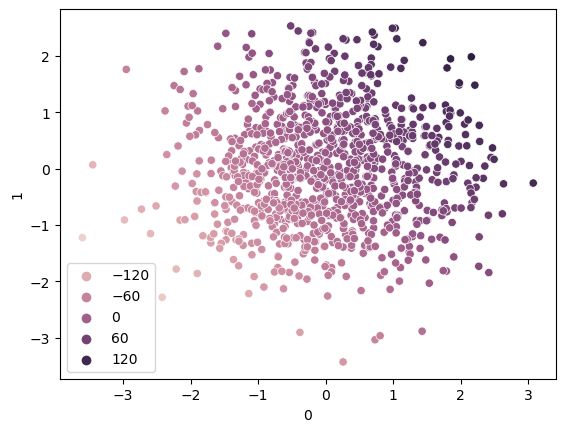

In [5]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

### Train test split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [8]:
from sklearn.svm import SVR

In [9]:
svr=SVR(kernel='linear')

In [10]:
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [11]:
svr.coef_  # since there are 2 features we are getting 2 coefficients or slope 

array([[38.79921688, 30.46271103]])

In [12]:
y_pred=svr.predict(x_test)

In [13]:
y_pred

array([ -53.24934606,    7.42541464,   57.26429731,  -13.55829799,
        -85.04804869,   -1.17132888,   49.84378218,  -15.47649606,
        -17.14263074,   -7.18117046,   18.13229035,   72.01972706,
        -37.12205405,   43.0879392 ,   -6.04153064,   21.76745683,
        -66.66845746,   65.90660841,   22.86126833,   28.75878102,
         27.5148778 ,  -86.5435412 ,   55.46496896,   28.88614586,
         -6.35240709,  -23.19894973,  -50.79551311,   31.05760573,
         82.24842264,    8.90967151,    7.41779335,   -3.05098264,
         -6.67125888,    7.56645237,   34.62516524,   59.22671764,
        -26.3359456 ,   -3.17004948,   21.72081739,  108.49142645,
         26.1576907 ,   55.20558956,   10.19084258,  -23.75004785,
          4.57751441,   29.83944054,   69.08905214,  -45.34574698,
        -53.03458356,   52.23218052,   37.98243643,   55.79633632,
        -83.44661601,   20.46702332,  -51.61006504,   -9.18925094,
         51.99302493,  -30.82481207,  -18.58367084,   23.00688

In [14]:
# for checking accuracy us er2 score
from sklearn.metrics import r2_score

In [15]:
r2_score(y_test,y_pred)   # 99.8% accuracy 

0.9958440511748675

the reason we are getting so high accuracy is that we have performed featured scaling (automatically done).so error as per margin will come in small amount.

when our data is highly scattered then we got low accuracy 

### Hyperpaarmeter tunning with SVR

In [16]:
from sklearn.model_selection import GridSearchCV

In [26]:
param_grid={'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['linear'],
            'epsilon':[0.1,0.2,0.3]
           }

In [27]:
grid=GridSearchCV(SVR(),param_grid=param_grid,cv=5,scoring='neg_mean_squared_error',refit=True,verbose=3)

In [28]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-38.187 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-36.205 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-33.497 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-46.898 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-37.399 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-38.187 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-36.205 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-33.497 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-46.898 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-37.399 total time=   0.0s
[CV 1/5] END C=0.1

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             scoring='neg_mean_squared_error', verbose=3)

In [29]:
grid.best_params_

{'C': 10, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [30]:
y_pred=svr.predict(x_test)

In [31]:
print(r2_score(y_test,y_pred))  # 99.5% accuracy

0.9958440511748675
